In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('C:/Users/abhir/Downloads/Credit Card FD Data/creditcard.csv')


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f'Duplicates: {df.duplicated().sum()}')

# Class distribution
print(df['Class'].value_counts(normalize=True))

# Basic statistics
print(df.describe())


## Removing Duplicates

In [5]:
df = df.drop_duplicates()
print(f'New dataset shape: {df.shape}')


New dataset shape: (283726, 31)


## Understanding Data

Class
0    283253
1       473
Name: count, dtype: int64
Fraud fraction: 0.001670


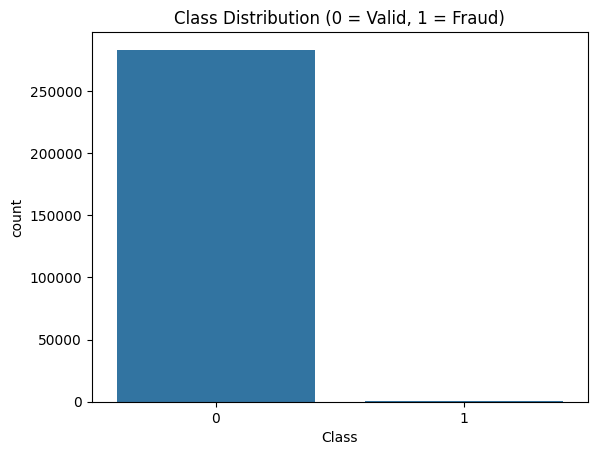

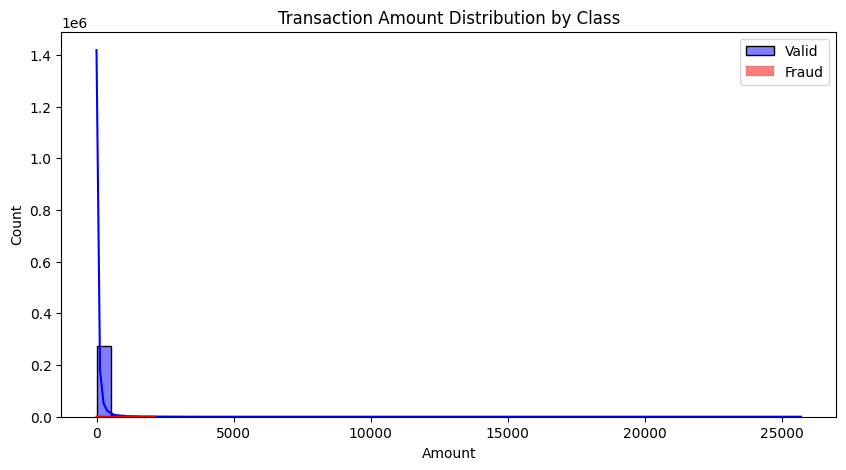

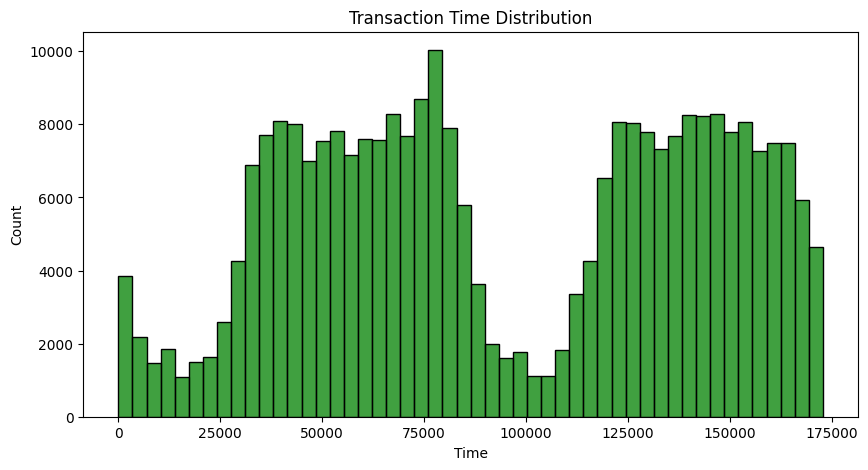

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution count
print(df['Class'].value_counts())

# Calculate fraction of fraud cases
fraud_count = df['Class'].sum()
valid_count = len(df) - fraud_count
print(f"Fraud fraction: {fraud_count / valid_count:.6f}")

# Visualize class imbalance with a bar chart
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Valid, 1 = Fraud)')
plt.show()

# Plot distribution of transaction amounts for fraud and valid
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Valid', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.show()

# Plot distribution of transaction time
plt.figure(figsize=(10,5))
sns.histplot(df['Time'], bins=50, color='green')
plt.title('Transaction Time Distribution')
plt.show()


## Creating New Columns for Day of week and Hour of Day

In [7]:
# Assuming 'Time' is in seconds since the first transaction
df['Hour'] = (df['Time'] // 3600) % 24  # 3600 seconds in an hour, 24-hour cycle

# Optional: If you want to extract the day (starting at 0)
df['Day'] = df['Time'] // (3600*24)


In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.0


## Transactions in Last 24 Hours

In [9]:
df = df.sort_values('Time').reset_index(drop=True)

times = df['Time'].values

# For each time, find the index of the first transaction outside the 24h window
start_indices = np.searchsorted(times, times - 86400, side='left')

# Number of transactions in last 24h = current index - start index
df['trans_count_24h'] = np.arange(len(times)) - start_indices


In [30]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Hour,Day,trans_count_24h,Log_Amount
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,0.244200,0,-2.407217,-0.98341,-2.298167,1.123062
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,-0.342584,0,-2.407217,-0.98341,-2.298145,-1.115298
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0,-2.407217,-0.98341,-2.298124,1.680981
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,0.139886,0,-2.407217,-0.98341,-2.298103,1.008128
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,-0.073813,0,-2.407217,-0.98341,-2.298081,0.669117


In [11]:
df['Log_Amount'] = np.log1p(df['Amount'])

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Hour,Day,trans_count_24h,Log_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.0,1,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0.0,2,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.0,3,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.0,4,4.262539


## Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# List of numeric features to scale
features_to_scale = ['Time', 'Amount', 'trans_count_24h', 'Log_Amount', 'Hour', 'Day']

# Fit scaler on the features and transform them
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check new transformed feature statistics
print(df[features_to_scale].describe())

               Time        Amount  trans_count_24h    Log_Amount  \
count  2.837260e+05  2.837260e+05     2.837260e+05  2.837260e+05   
mean   1.218105e-16 -1.602769e-18    -6.571355e-17 -1.722977e-16   
std    1.000002e+00  1.000002e+00     1.000002e+00  1.000002e+00   
min   -1.996823e+00 -3.533268e-01    -2.298167e+00 -1.903207e+00   
25%   -8.552128e-01 -3.309625e-01    -7.864951e-01 -7.644127e-01   
50%   -2.131081e-01 -2.654671e-01     6.809013e-01 -1.102319e-02   
75%    9.369423e-01 -4.378088e-02     7.806617e-01  7.298789e-01   
max    1.642362e+00  1.022476e+02     8.461315e-01  4.224415e+00   

               Hour           Day  
count  2.837260e+05  2.837260e+05  
mean  -5.128862e-17 -4.038979e-16  
std    1.000002e+00  1.000002e+00  
min   -2.407217e+00 -9.834102e-01  
25%   -6.933643e-01 -9.834102e-01  
50%    1.635622e-01 -9.834102e-01  
75%    8.491034e-01  1.016870e+00  
max    1.534645e+00  1.016870e+00  


In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Stratified split - 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check class distribution in train and test sets
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


Train class distribution:
 Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64
Test class distribution:
 Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


## Imbalanced Data Handling Using SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a random seed for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the imbalance before and after SMOTE
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())


Before SMOTE:
Class
0    226602
1       378
Name: count, dtype: int64

After SMOTE:
Class
0    226602
1    226602
Name: count, dtype: int64


## LightGBM

In [16]:
import lightgbm as lgb
from lightgbm import early_stopping

model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=1000,
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
    random_state=42,
    verbosity=-1
)

model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_test, y_test)],
    eval_metric='aucpr',
    callbacks=[early_stopping(stopping_rounds=50)],
)


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[291]	valid_0's binary_logloss: 0.0122865


LGBMClassifier(learning_rate=0.05, n_estimators=1000, objective='binary',
               random_state=42, scale_pos_weight=599.4761904761905,
               verbosity=-1)

In [17]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Predict probabilities and class labels
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)

# Detailed metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("PR-AUC:", average_precision_score(y_test, y_pred_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.33      0.80      0.47        95

    accuracy                           1.00     56746
   macro avg       0.67      0.90      0.73     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.95068103968063
PR-AUC: 0.7751301182639441


## Random Forest 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Initialize Random Forest with class weight balanced
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train on the SMOTE-resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("PR-AUC:", average_precision_score(y_test, y_pred_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.75      0.83        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.9438665550568625
PR-AUC: 0.8121080308935338


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Initialize Logistic Regression with class weight balanced
lr_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
    solver='liblinear'  # good for smaller datasets and binary classification
)

# Train on the SMOTE-resampled training data
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("PR-AUC:", average_precision_score(y_test, y_pred_prob))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746

ROC-AUC: 0.9642910563199051
PR-AUC: 0.6831014360664689


## Xgboost

In [32]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Prepare DMatrix for train and test sets
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for imbalanced binary classification
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',  # PR-AUC for imbalanced data
    'scale_pos_weight': y_train.value_counts()[0] / y_train.value_counts()[1],
    'learning_rate': 0.05,
    'max_depth': 6,
    'seed': 42,
}

# Set up watchlist for early stopping
evals = [(dtest, 'eval'), (dtrain, 'train')]

# Train with early stopping but suppress logs
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=False  
)

# Predict on test data using only trees up to best_iteration
y_pred_prob = model.predict(dtest, iteration_range=(0, model.best_iteration))
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate and print metrics (final results only)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_pred_prob):.4f}")



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.50      0.80      0.62        95

    accuracy                           1.00     56746
   macro avg       0.75      0.90      0.81     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.9544
PR-AUC: 0.8031


## Comparison in Performance of Different Models

In [35]:
# Initialize data with models and placeholder values
data = {
    'Model': ['XGBoost', 'Random Forest', 'LightGBM', 'Logistic Regression'],
    'Precision (Fraud)': [0.50, 0.93, 0.33, 0.05],
    'Recall (Fraud)': [0.80, 0.75, 0.80, 0.87],
    'F1-score (Fraud)': [0.62, 0.83, 0.47, 0.10],
    'ROC-AUC': [0.9544, 0.9438, 0.9506, 0.9642],
    'PR-AUC': [0.8031, 0.8121, 0.7751, 0.6831]
}

# Create DataFrame
df_comparison = pd.DataFrame(data)

# Display the table - you can fill or update the None values later
df_comparison


,Model,Precision (Fraud),Recall (Fraud),F1-score (Fraud),ROC-AUC,PR-AUC
0,XGBoost,0.50,0.80,0.62,0.9544,0.8031
1,Random Forest,0.93,0.75,0.83,0.9438,0.8121
2,LightGBM,0.33,0.80,0.47,0.9506,0.7751
3,Logistic Regression,0.05,0.87,0.10,0.9642,0.6831


## Finding Best Hyper-Parameters for XGBoost Using Optuna

In [37]:
import optuna
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import logging

# 🔇 Suppress Optuna logging
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Split your resampled training data into train/validation for tuning
X_tr, X_val, y_tr, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Convert to DMatrix once for faster training
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval = xgb.DMatrix(X_val, label=y_val)

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'aucpr',
        'scale_pos_weight': y_tr.value_counts()[0] / y_tr.value_counts()[1],
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'seed': 42
    }

    evallist = [(dval, 'eval')]
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=1000,
        evals=evallist,
        early_stopping_rounds=50,
        verbose_eval=False
    )

    y_pred = model.predict(dval, iteration_range=(0, model.best_iteration))
    y_pred_label = (y_pred >= 0.5).astype(int)

    recall = recall_score(y_val, y_pred_label)
    return recall  # Maximize recall

# Create study and optimize (no trial-by-trial logs will be shown)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# ✅ Only final results will be printed
print("Best hyperparameters:", study.best_params)
print("Best recall score:", study.best_value)


Best hyperparameters: {'max_depth': 3, 'min_child_weight': 10, 'gamma': 0.21610189498307386, 'subsample': 0.7328610214081003, 'colsample_bytree': 0.9476878852739342, 'learning_rate': 0.1533703613152116, 'reg_alpha': 0.9373090247301371, 'reg_lambda': 0.5909834051780206}
Best recall score: 1.0


## Training XGBoost with New Hyper-Parameters

In [38]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# DMatrix conversion
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Use your best params from Optuna
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',
    'scale_pos_weight': y_train.value_counts()[0] / y_train.value_counts()[1],
    'max_depth': 3,
    'min_child_weight': 10,
    'gamma': 0.2161,
    'subsample': 0.7328,
    'colsample_bytree': 0.9476,
    'learning_rate': 0.1533,
    'reg_alpha': 0.9373,
    'reg_lambda': 0.5909,
    'seed': 42
}

evals = [(dtest, 'eval'), (dtrain, 'train')]

model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=False
)

y_pred_prob = model.predict(dtest, iteration_range=(0, model.best_iteration))
y_pred = (y_pred_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob)}")
print(f"PR-AUC: {average_precision_score(y_test, y_pred_prob)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.60      0.81      0.69        95

    accuracy                           1.00     56746
   macro avg       0.80      0.90      0.84     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.9616115848747037
PR-AUC: 0.8138815872676597


## Final Comparison Between Models

In [43]:
import pandas as pd

# Prepare the data for each model's fraud detection metrics
data = {
    'Model': ['XGBoost (Tuned)', 'XGBoost (Default)', 'Random Forest', 'LightGBM', 'Logistic Regression'],
    'Precision (Fraud)': [0.60, 0.50, 0.93, 0.33, 0.05],
    'Recall (Fraud)': [0.81, 0.80, 0.75, 0.80, 0.87],
    'F1-score (Fraud)': [0.69, 0.62, 0.83, 0.47, 0.10],
    'ROC-AUC': [0.9616,0.9544, 0.9438, 0.9506, 0.9642],
    'PR-AUC': [0.8138, 0.8031, 0.8121, 0.7751, 0.6831]
}

# Create DataFrame
df_metrics = pd.DataFrame(data)

# Display the table nicely in Jupyter
df_metrics


,Model,Precision (Fraud),Recall (Fraud),F1-score (Fraud),ROC-AUC,PR-AUC
0,XGBoost (Tuned),0.60,0.81,0.69,0.9616,0.8138
1,XGBoost (Default),0.50,0.80,0.62,0.9544,0.8031
2,Random Forest,0.93,0.75,0.83,0.9438,0.8121
3,LightGBM,0.33,0.80,0.47,0.9506,0.7751
4,Logistic Regression,0.05,0.87,0.10,0.9642,0.6831
